# Feature Engineering and Advanced Preprocessing

In [1]:
import pandas as pd
import pandas_profiling # удобный пакет для быстрого знакомтсва с датасетом
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

import category_encoders as ce

plt.style.use('seaborn-colorblind')
%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
import warnings
warnings.filterwarnings("ignore") # не очень хорошо так делать, но пусть будет так, предупреждения мешают

In [3]:
PATH = "~/PycharmProjects/Datasets/titanic_dataset/"

In [4]:
origin_dataset_train = pd.read_csv(PATH + "train.csv")
print("Shape of dataset is {}".format(origin_dataset_train.shape))
origin_dataset_train.head()

Shape of dataset is (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
origin_dataset_test = pd.read_csv(PATH + "test.csv")
print("Shape of dataset is {}".format(origin_dataset_test.shape))
origin_dataset_test.head()

Shape of dataset is (418, 11)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
pandas_profiling.ProfileReport(origin_dataset_train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
pandas_profiling.ProfileReport(origin_dataset_test)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
titanic_dataset_origin = pd.concat([origin_dataset_train, origin_dataset_test], ignore_index=True)
titanic_dataset_origin

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [9]:
use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

titanic_dataset = origin_dataset_train[use_cols] # titanic_dataset_origin[use_cols]
print(titanic_dataset.shape)
titanic_dataset.head(8)

(891, 6)


Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500
5         0       3    male   NaN      0   8.4583
6         0       1    male  54.0      0  51.8625
7         0       3    male   2.0      3  21.0750

In [10]:
titanic_dataset.drop_duplicates(inplace=True)

In [11]:
titanic_dataset.shape

(776, 6)

In [12]:
pandas_profiling.ProfileReport(titanic_dataset)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Обработка датасета

### Пропущенные значения

Большинство алгоритмов не работает с пропущенными значениями.

Мусор на входе - мусор на выходе. 

Строкки с пропущенными значениями потенциально имеют в себе полезную информацию.

Проверка пропущенных значений:

In [13]:
def check_missing(data,output_path=None):    
    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing', 1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print(output_path, 'missing.csv')
    return result

In [14]:
check_missing(data=titanic_dataset)

total missing  proportion
Survived              0    0.000000
Pclass                0    0.000000
Sex                   0    0.000000
Age                 102    0.131443
SibSp                 0    0.000000
Fare                  0    0.000000

<AxesSubplot:xlabel='Age', ylabel='Density'>

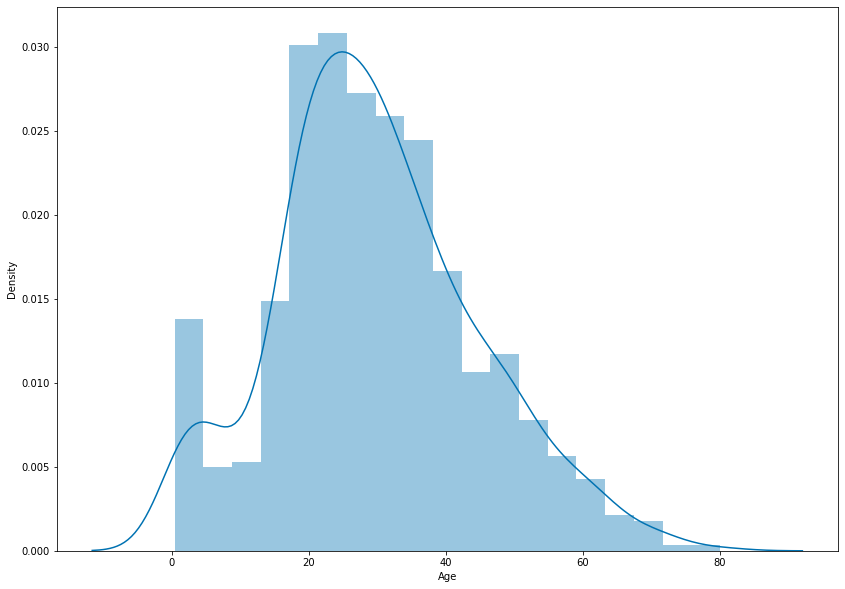

In [15]:
sns.distplot(titanic_dataset["Age"])

### Существует несколько подходов работы с пропущенными значениями:

- Удаление

- Заполнение

Удаление пропущенных значений - самый простой способ очистки данных.

In [16]:
def drop_missing(data,axis=0):
    """Creating additional dataset which is a copy of origin dataset 
        with dropped NA values"""
    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis,inplace=False)
    return data_copy

In [17]:
titanic_dataset_dropped_na = drop_missing(data=titanic_dataset)
titanic_dataset_dropped_na.shape

(674, 6)

Достоинства удаления:

- этот метод не изменяет само распределение значений в переменной

Недостатки: 

- потеря полезной информации из датасета

<AxesSubplot:xlabel='Age', ylabel='Density'>

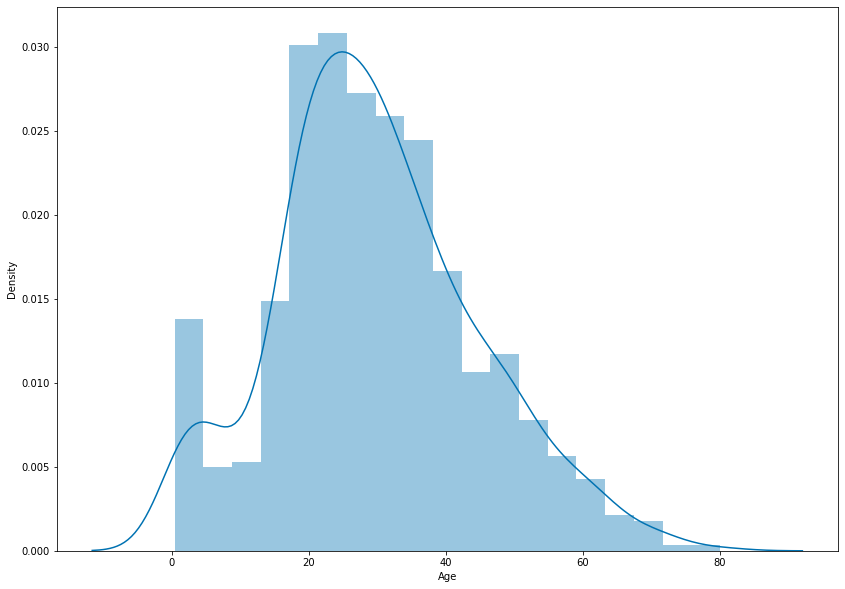

In [18]:
sns.distplot(titanic_dataset_dropped_na["Age"])

Добавление переменной оценки пропущенных значений

In [19]:
def add_var_denote_NA(data,NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_is_NA'] = np.where(data_copy[i].isnull(),1,0)
        else:
            warn("Нет пропущенных значений" % i)          
    return data_copy

In [20]:
titanic_dataset_denoted_na = add_var_denote_NA(data=titanic_dataset,NA_col=['Age'])
print(titanic_dataset_denoted_na.Age_is_NA.value_counts())
titanic_dataset_denoted_na.head(8)

0    674
1    102
Name: Age_is_NA, dtype: int64


Survived  Pclass     Sex   Age  SibSp     Fare  Age_is_NA
0         0       3    male  22.0      1   7.2500          0
1         1       1  female  38.0      1  71.2833          0
2         1       3  female  26.0      0   7.9250          0
3         1       1  female  35.0      1  53.1000          0
4         0       3    male  35.0      0   8.0500          0
5         0       3    male   NaN      0   8.4583          1
6         0       1    male  54.0      0  51.8625          0
7         0       3    male   2.0      3  21.0750          0

<AxesSubplot:xlabel='Age_is_NA', ylabel='Density'>

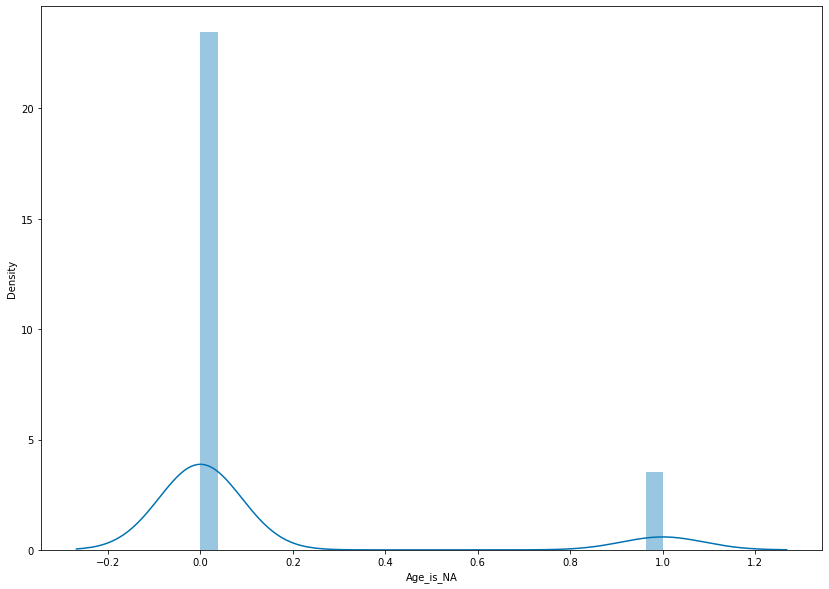

In [21]:
sns.distplot(titanic_dataset_denoted_na["Age_is_NA"])

Достоинства: 

- нет преобразований исходного датасета
- добавление переменных, объясняющих другие переменные

Недостатки:

- расширение пространства признаков модели, что не всегда хорошо 
- появление строго-мультиколинеарных признаков - ломает некоторые алгоритмы

Заполнение пропусков выборочным значением

In [22]:
def impute_NA_with_arbitrary(data,impute_value,NA_col=[]):  
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_'+str(impute_value)] = data_copy[i].fillna(impute_value)
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy

In [23]:
titanic_dataset_inputed_arbitrary = impute_NA_with_arbitrary(data=titanic_dataset,impute_value=-999,NA_col=['Age'])
titanic_dataset_inputed_arbitrary.head(8)
# Почему -999? Для того, чтобы лучше работали классификаторы. 
# Для нелинейных классификаоторов (random forest, например) это удобное значение для классификации
# Качество нелинейной модели должно улучшиться

Survived  Pclass     Sex   Age  SibSp     Fare  Age_-999
0         0       3    male  22.0      1   7.2500      22.0
1         1       1  female  38.0      1  71.2833      38.0
2         1       3  female  26.0      0   7.9250      26.0
3         1       1  female  35.0      1  53.1000      35.0
4         0       3    male  35.0      0   8.0500      35.0
5         0       3    male   NaN      0   8.4583    -999.0
6         0       1    male  54.0      0  51.8625      54.0
7         0       3    male   2.0      3  21.0750       2.0

<AxesSubplot:xlabel='Age_-999', ylabel='Density'>

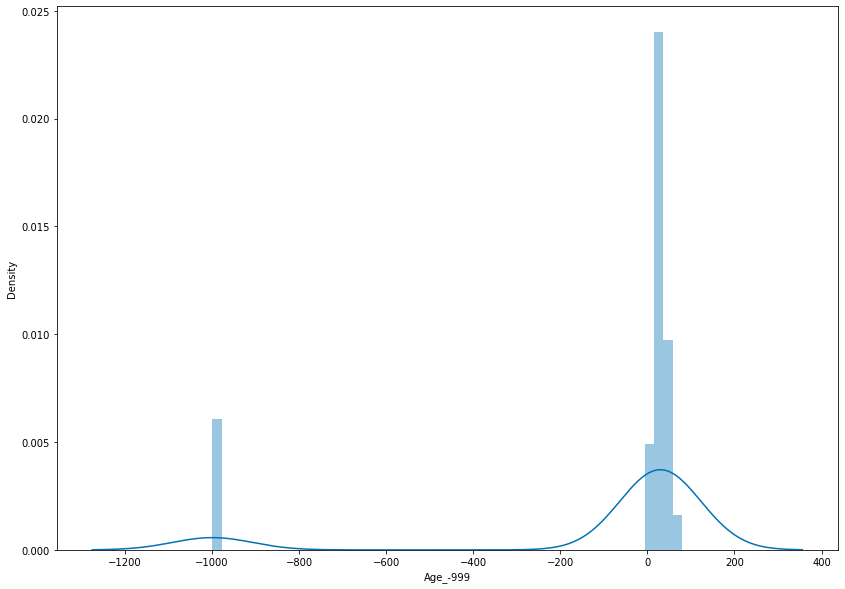

In [24]:
sns.distplot(titanic_dataset_inputed_arbitrary["Age_-999"])

Достоинства: 

- нет преобразований исходного датасета
- добавление переменных, объясняющих другие переменные
- подходит для нейлинейных моделей (чаще всего)

Недостатки:

- расширение пространства признаков модели, что не всегда хорошо 
- нарушение распределения данных в колонке - плохо для линейных моделей
- если очень много пропущенных значений - даже нелинейный алгоритм может плохо работать; если мало - алгоритм отнесёт их к выбросам; в общем, всё равно плохо и использовать стоит крайне аккуратно (а может и не использовать вообще)

Почему не заполнить NA на неестественное значение без добавления дополнительного признака? Ответ: при обучении модели не используется исходная колонка с данными, а только созданная. (но зачем?) 

Увеличение размерности за счёт добавления фичей - хорошо или плохо? It depends (c) Зависит от датасета, конечно же. 

Лучше не использовать циклы при переборе датасета. Есть более оптимальные функции.

Большие датасеты можно делить на батчи. 

Заполнение пропущенных значений средним/медианой/модой

In [25]:
def impute_NA_with_avg(data,strategy='mean',NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            if strategy=='mean':
                data_copy[i+'_impute_mean'] = data_copy[i].fillna(data[i].mean())
            elif strategy=='median':
                data_copy[i+'_impute_median'] = data_copy[i].fillna(data[i].median())
            elif strategy=='mode':
                data_copy[i+'_impute_mode'] = data_copy[i].fillna(data[i].mode()[0])
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy  

In [26]:
print(titanic_dataset.Age.median())
titanic_dataset_by_strategy = impute_NA_with_avg(data=titanic_dataset,strategy='median',NA_col=['Age'])
titanic_dataset_by_strategy.head(8)

28.0


Survived  Pclass     Sex   Age  SibSp     Fare  Age_impute_median
0         0       3    male  22.0      1   7.2500               22.0
1         1       1  female  38.0      1  71.2833               38.0
2         1       3  female  26.0      0   7.9250               26.0
3         1       1  female  35.0      1  53.1000               35.0
4         0       3    male  35.0      0   8.0500               35.0
5         0       3    male   NaN      0   8.4583               28.0
6         0       1    male  54.0      0  51.8625               54.0
7         0       3    male   2.0      3  21.0750                2.0

<AxesSubplot:xlabel='Age_impute_median', ylabel='Density'>

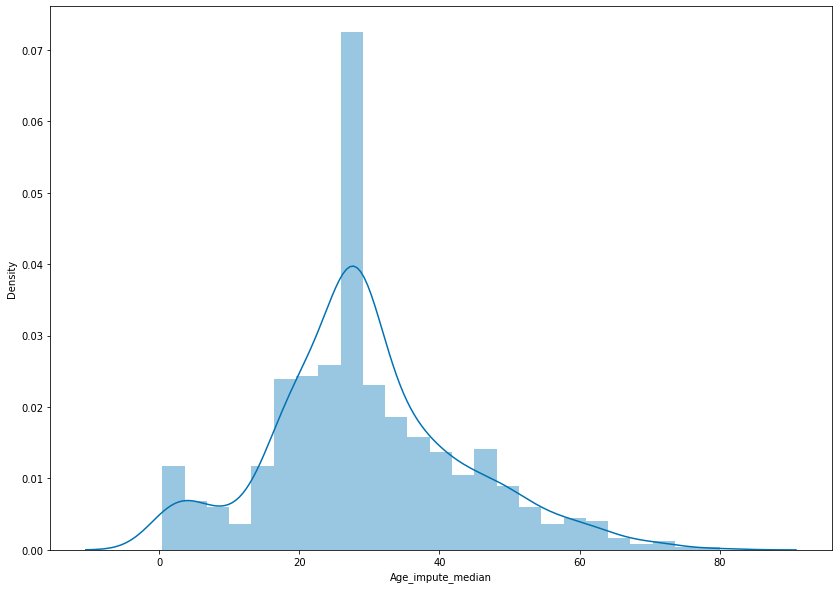

In [27]:
sns.distplot(titanic_dataset_by_strategy["Age_impute_median"])

В sklearn уже реализованы необходимые функции. Причём существует множество стратегий:
https://scikit-learn.org/stable/modules/impute.html

In [28]:
from sklearn.impute import SimpleImputer
simple_inputer = SimpleImputer(strategy="median")

titanic_dataset_imputed = titanic_dataset.copy()

In [29]:
tmp = titanic_dataset_imputed.drop(columns=["Survived"]).select_dtypes(include=['float64', 'int64'])
tmp.head(8)

Pclass   Age  SibSp     Fare
0       3  22.0      1   7.2500
1       1  38.0      1  71.2833
2       3  26.0      0   7.9250
3       1  35.0      1  53.1000
4       3  35.0      0   8.0500
5       3   NaN      0   8.4583
6       1  54.0      0  51.8625
7       3   2.0      3  21.0750

In [30]:
titanic_dataset_imputed.loc[:, ["Pclass", "Age", "SibSp", "Fare"]] = simple_inputer.fit_transform(tmp)
titanic_dataset_imputed.head(10)

Survived  Pclass     Sex   Age  SibSp     Fare
0         0     3.0    male  22.0    1.0   7.2500
1         1     1.0  female  38.0    1.0  71.2833
2         1     3.0  female  26.0    0.0   7.9250
3         1     1.0  female  35.0    1.0  53.1000
4         0     3.0    male  35.0    0.0   8.0500
5         0     3.0    male  28.0    0.0   8.4583
6         0     1.0    male  54.0    0.0  51.8625
7         0     3.0    male   2.0    3.0  21.0750
8         1     3.0  female  27.0    0.0  11.1333
9         1     2.0  female  14.0    1.0  30.0708

Альтернативный вариант обучения imputer'а.

In [31]:
titanic_dataset_imputed_alter = titanic_dataset.copy()
# titanic_dataset_imputed_alter['Age']
# titanic_dataset_imputed_alter[['Age']]
titanic_dataset_imputed_alter.head(10)

Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500
5         0       3    male   NaN      0   8.4583
6         0       1    male  54.0      0  51.8625
7         0       3    male   2.0      3  21.0750
8         1       3  female  27.0      0  11.1333
9         1       2  female  14.0      1  30.0708

In [32]:
simple_inputer_alter = SimpleImputer(strategy="mean")

simple_inputer_alter = simple_inputer_alter.fit(titanic_dataset_imputed_alter[['Age']])
titanic_dataset_imputed_alter[['Age']] = simple_inputer_alter.transform(titanic_dataset_imputed_alter[['Age']])
titanic_dataset_imputed_alter.head(10)

Survived  Pclass     Sex        Age  SibSp     Fare
0         0       3    male  22.000000      1   7.2500
1         1       1  female  38.000000      1  71.2833
2         1       3  female  26.000000      0   7.9250
3         1       1  female  35.000000      1  53.1000
4         0       3    male  35.000000      0   8.0500
5         0       3    male  29.819614      0   8.4583
6         0       1    male  54.000000      0  51.8625
7         0       3    male   2.000000      3  21.0750
8         1       3  female  27.000000      0  11.1333
9         1       2  female  14.000000      1  30.0708

<AxesSubplot:xlabel='Age', ylabel='Density'>

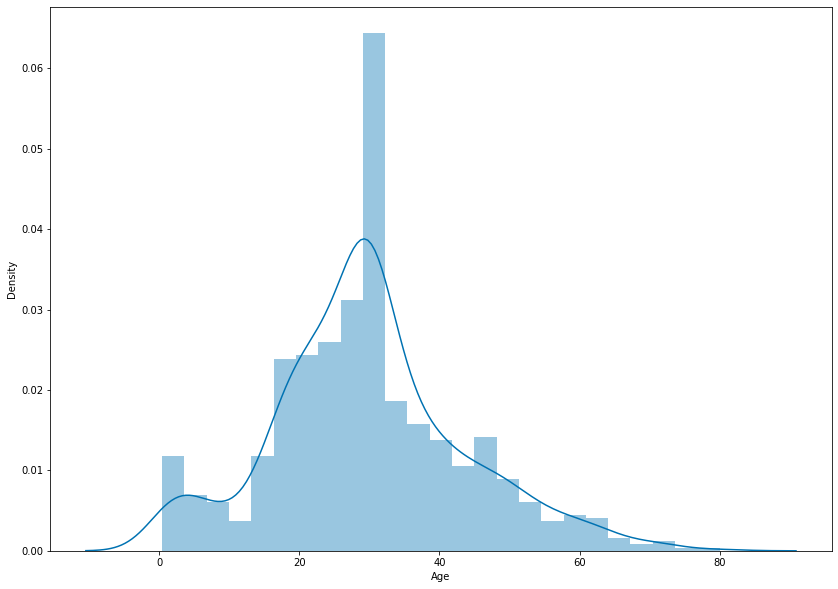

In [33]:
sns.distplot(titanic_dataset_imputed_alter["Age"])

Какую стратегию лучше всего использовать? It depends (c)

Чаще всего на практике используют среднее, но и у среднего есть недостатки - подверженность влиянию выбросов. Если много выбросов - лучше использовать медиану, т. к. она более робастна (устойчива к выбросам). 

Недостатки: 

- могут возникнуть изменения в корреляции между переменными

Заполнение пропусков значением из "хвоста" распределения

In [34]:
def impute_NA_with_end_of_distribution(data,NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_impute_end_of_distri'] = data_copy[i].fillna(data[i].mean()+3*data[i].std())
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy

In [35]:
titanic_dataset_end_distr = impute_NA_with_end_of_distribution(data=titanic_dataset,NA_col=['Age'])
titanic_dataset_end_distr.head(8)

Survived  Pclass     Sex   Age  SibSp     Fare  Age_impute_end_of_distri
0         0       3    male  22.0      1   7.2500                 22.000000
1         1       1  female  38.0      1  71.2833                 38.000000
2         1       3  female  26.0      0   7.9250                 26.000000
3         1       1  female  35.0      1  53.1000                 35.000000
4         0       3    male  35.0      0   8.0500                 35.000000
5         0       3    male   NaN      0   8.4583                 74.055743
6         0       1    male  54.0      0  51.8625                 54.000000
7         0       3    male   2.0      3  21.0750                  2.000000

<AxesSubplot:xlabel='Age_impute_end_of_distri', ylabel='Density'>

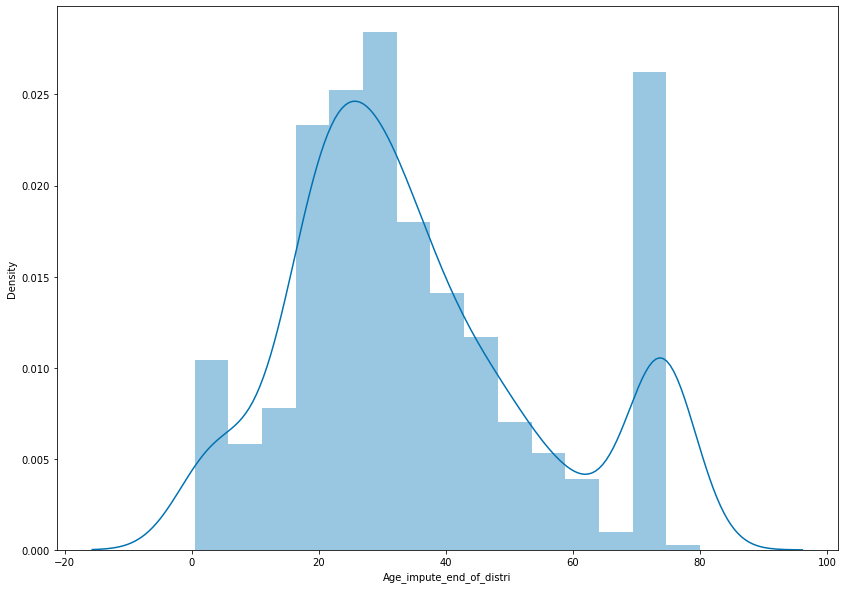

In [36]:
sns.distplot(titanic_dataset_end_distr["Age_impute_end_of_distri"])

Среднее + 3 сигма. 

Достоинства:

- нет преобразований исходного датасета

Недостатки:

- нарушение распределения? 
- маскировка выбросов (не ясно, что представляет из себя полученное значение - выброс или нет?)

Заполнение пропусков случайными значениями

In [37]:
def impute_NA_with_random(data,NA_col=[],random_state=0):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_random'] = data_copy[i]
            random_sample = data_copy[i].dropna().sample(data_copy[i].isnull().sum(), random_state=random_state)
            random_sample.index = data_copy[data_copy[i].isnull()].index
            data_copy.loc[data_copy[i].isnull(), str(i)+'_random'] = random_sample
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy 

In [38]:
titanic_dataset_rand_fill = impute_NA_with_random(data=titanic_dataset,NA_col=['Age'])
titanic_dataset_rand_fill.head(8)

Survived  Pclass     Sex   Age  SibSp     Fare  Age_random
0         0       3    male  22.0      1   7.2500        22.0
1         1       1  female  38.0      1  71.2833        38.0
2         1       3  female  26.0      0   7.9250        26.0
3         1       1  female  35.0      1  53.1000        35.0
4         0       3    male  35.0      0   8.0500        35.0
5         0       3    male   NaN      0   8.4583        28.0
6         0       1    male  54.0      0  51.8625        54.0
7         0       3    male   2.0      3  21.0750         2.0

<AxesSubplot:xlabel='Age_random', ylabel='Density'>

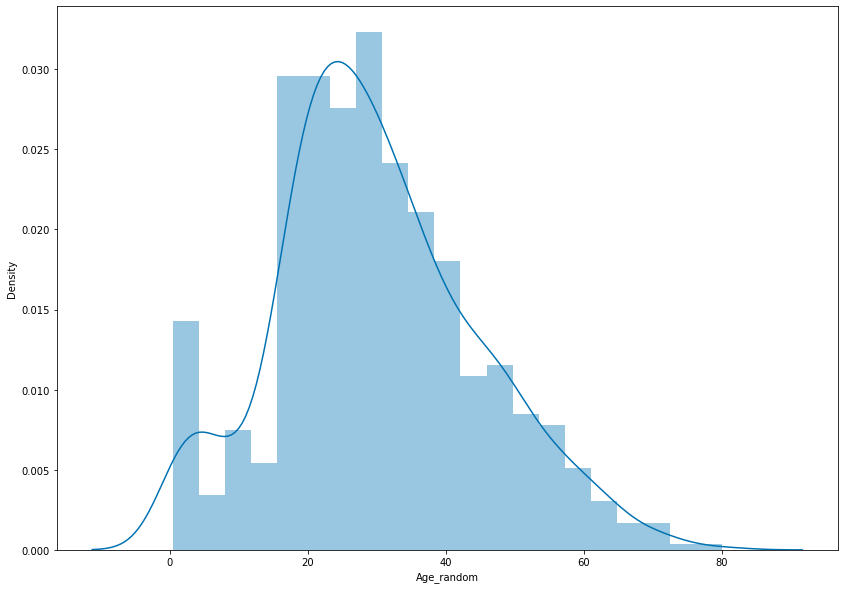

In [39]:
sns.distplot(titanic_dataset_rand_fill["Age_random"])

Достоинства:

- сохранение распределения

Недостатки:

- интерпретируемость хуже (для бизнес-задач, т. к. невозможно объяснить причины заполнения)

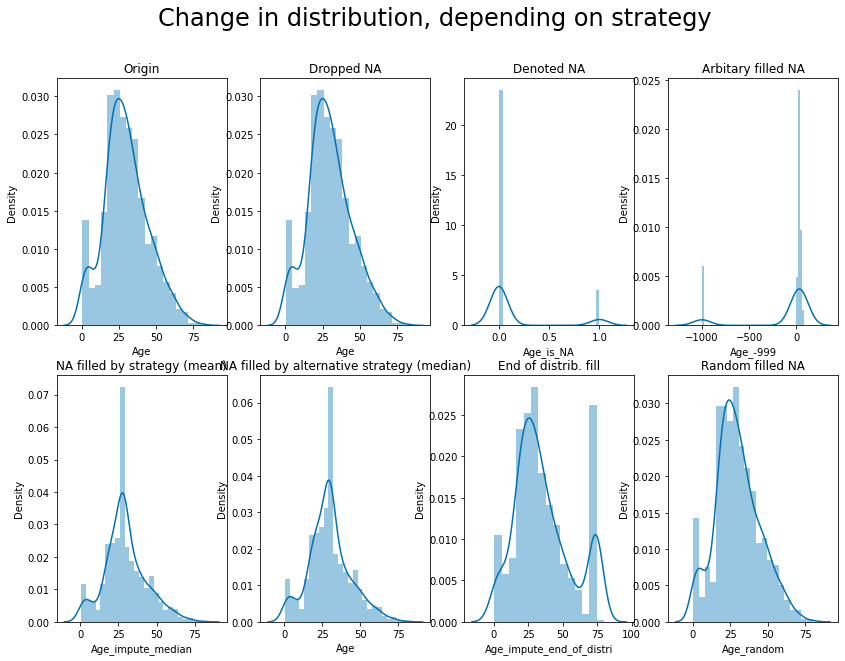

In [40]:
f, axes = plt.subplots(2, 4)

f.suptitle('Сhange in distribution, depending on strategy', fontsize=24)
sns.distplot(titanic_dataset["Age"], ax=axes[0, 0]).set_title("Origin")
sns.distplot(titanic_dataset_dropped_na["Age"], ax=axes[0, 1]).set_title("Dropped NA")
sns.distplot(titanic_dataset_denoted_na["Age_is_NA"], ax=axes[0, 2]).set_title("Denoted NA")
sns.distplot(titanic_dataset_inputed_arbitrary["Age_-999"], ax=axes[0, 3]).set_title("Arbitary filled NA")
sns.distplot(titanic_dataset_by_strategy["Age_impute_median"], ax=axes[1, 0]).set_title("NA filled by strategy (mean)")
sns.distplot(titanic_dataset_imputed_alter["Age"], ax=axes[1, 1]).set_title("NA filled by alternative strategy (median)")
sns.distplot(titanic_dataset_end_distr["Age_impute_end_of_distri"], ax=axes[1, 2]).set_title("End of distrib. fill")
sns.distplot(titanic_dataset_rand_fill["Age_random"], ax=axes[1, 3]).set_title("Random filled NA");

Помимо указанных существуют методы с использованием машинного обучения - kNN, деревья решений.

## Выбросы

Детекция с помощью выборочных значений

Сначала проводим EDA и выделяем некоторые границы - верхнюю и нижнюю для каждой переменной. В зависимости от попадания (или не попадания) значений в указанный интервал их можно классифицировать как выбросы.

In [57]:
def outlier_detect_arbitrary(data, col, upper_fence, lower_fence):
    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col] > upper_fence, data[col] < lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))    
    return(outlier_index, para)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

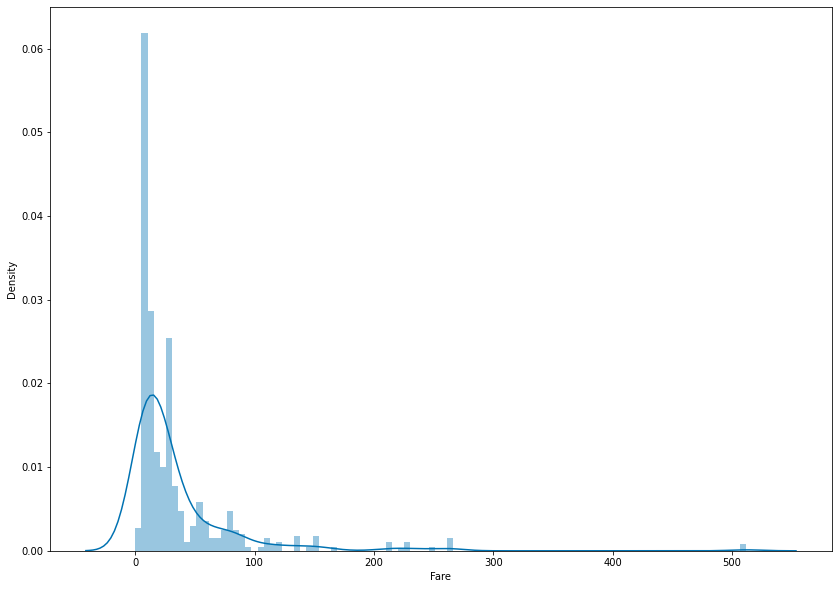

In [58]:
sns.distplot(titanic_dataset["Fare"], bins=100)

<AxesSubplot:ylabel='Fare'>

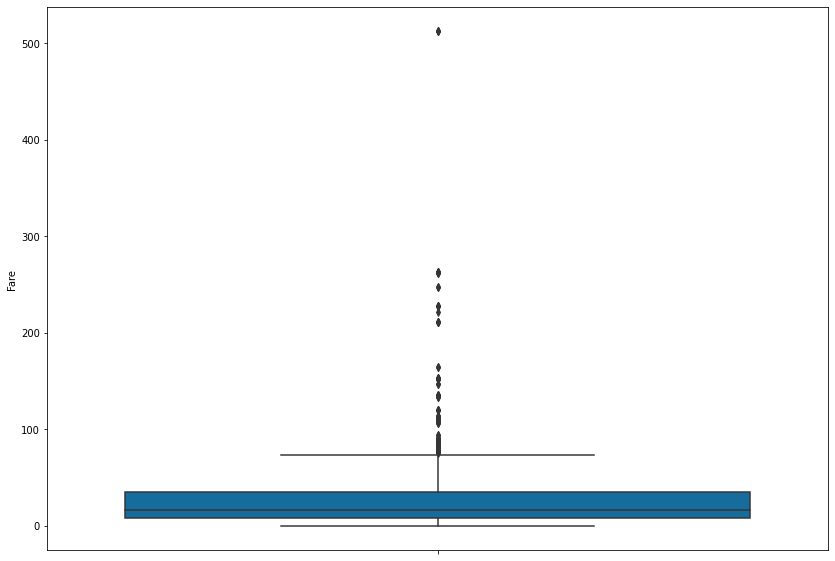

In [59]:
sns.boxplot(data=titanic_dataset, y="Fare")
# sns.swarmplot(data=titanic_dataset, y="Fare", color=".25")

<AxesSubplot:ylabel='Fare'>

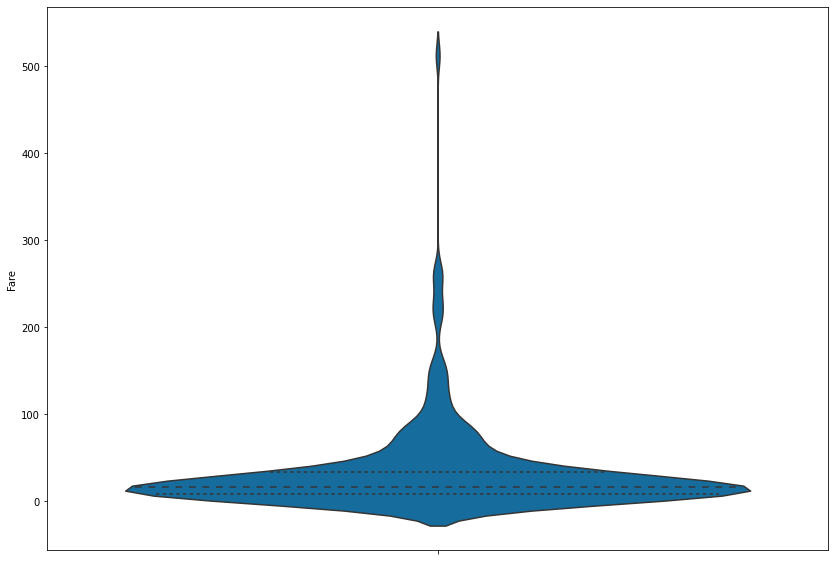

In [60]:
sns.violinplot(data=titanic_dataset, y="Fare", inner="quartile")

<AxesSubplot:ylabel='Fare'>

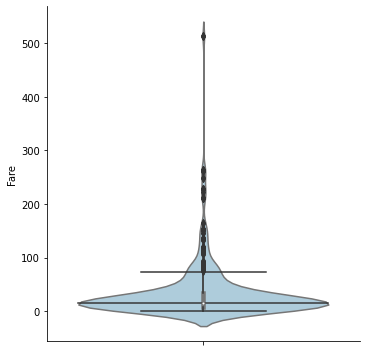

In [61]:
g = sns.catplot(data=titanic_dataset, y="Fare", kind="violin", inner='boxen', palette="Paired")
sns.boxplot(data=titanic_dataset, y="Fare", showbox=False, ax=g.ax)

In [62]:
index, para = outlier_detect_arbitrary(data=titanic_dataset,col='Fare',upper_fence=100,lower_fence=5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 63
Доля выбросов: 0.08118556701030928
Верхняя граница: 100 
Нижняя граница: 5


In [63]:
titanic_dataset.loc[index,'Fare'].sort_values()

263      0.0000
806      0.0000
302      0.0000
179      0.0000
597      0.0000
         ...   
88     263.0000
27     263.0000
679    512.3292
737    512.3292
258    512.3292
Name: Fare, Length: 63, dtype: float64

Интерквартильное расстояние

In [53]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [54]:
index, para = outlier_detect_IQR(data=titanic_dataset, col='Fare', threshold=5)
print('Верхняя граница:', para[0], '\nНижняя граница:', para[1])

Количество выбросов в данных: 20
Доля выбросов: 0.02577319587628866
Верхняя граница: 166.0 
Нижняя граница: -123.575


In [ ]:
titanic_dataset.loc[index,'Fare'].sort_values()

Среднее-среднеквадратичное отклонение

In [44]:
def outlier_detect_mean_std(data, col, threshold = 3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return(outlier_index, para)

In [45]:
index, para = outlier_detect_mean_std(data=titanic_dataset, col='Fare', threshold=3)
print('Верхняя граница:', para[0], '\nНижняя граница:', para[1])

Количество выбросов в данных: 20
Доля выбросов: 0.02577319587628866
Верхняя граница: 192.0543797756689 
Нижняя граница: -122.11775013649365


Имеет смысл применять только для данных, имеющих нормальное распределение.

In [ ]:
# sns.distplot(np.log(titanic_dataset["Fare"]+.01), bins=30)

In [ ]:
titanic_dataset.loc[index,'Fare'].sort_values()

Медианы абсолютного отклонения (MAD) - https://en.wikipedia.org/wiki/Median_absolute_deviation

In [ ]:
def outlier_detect_MAD(data, col, threshold=3.5):
    median = data[col].median()
    median_absolute_deviation = np.median([np.abs(y - median) for y in data[col]])
    modified_z_scores = pd.Series([0.6745 * (y - median) / median_absolute_deviation for y in data[col]])
    outlier_index = np.abs(modified_z_scores) > threshold
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return(outlier_index)

In [ ]:
index = outlier_detect_MAD(data=titanic_dataset, col='Fare', threshold=3.5)

Замена выброса выборочным значением

Конкретно в данном случае необходимо сначала применить метод детекции выбросов (например, интерквартильное расстояние), а потом замену выбросов.

In [55]:
def impute_outlier_with_arbitrary(data, outlier_index, value, col=[]):
    data_copy = data.copy(deep=True)
    for i in col:
        data_copy.loc[outlier_index,i] = value
    return data_copy

In [56]:
titanic_dataset_outlier_arb = impute_outlier_with_arbitrary(data=titanic_dataset, outlier_index=index,
                                         value=-999, col=['Fare'])
titanic_dataset_outlier_arb[25:35]

Survived  Pclass     Sex   Age  SibSp      Fare
25         1       3  female  38.0      1   31.3875
26         0       3    male   NaN      0    7.2250
27         0       1    male  19.0      3 -999.0000
28         1       3  female   NaN      0    7.8792
29         0       3    male   NaN      0    7.8958
30         0       1    male  40.0      0   27.7208
31         1       1  female   NaN      1  146.5208
32         1       3  female   NaN      0    7.7500
33         0       2    male  66.0      0   10.5000
34         0       1    male  28.0      1   82.1708

Виндзоризация

{92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, −40, 101, 86, 85, 15, 89, 89, 28, −5, 41}  

{92, 19, 101, 58, 101, 91, 26, 78, 10, 13, −5, 101, 86, 85, 15, 89, 89, 28, −5, 41} 

In [64]:
def windsorization(data, col, para, strategy='both'):
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
        data_copy.loc[data_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col]<para[1],col] = para[1]  
    return(data_copy)

In [67]:
titanic_dataset_windsorization = windsorization(data=titanic_dataset, col='Fare', para=para, strategy='both')
titanic_dataset_windsorization[25:35] # 27, 31

Survived  Pclass     Sex   Age  SibSp      Fare
25         1       3  female  38.0      1   31.3875
26         0       3    male   NaN      0    7.2250
27         0       1    male  19.0      3  100.0000
28         1       3  female   NaN      0    7.8792
29         0       3    male   NaN      0    7.8958
30         0       1    male  40.0      0   27.7208
31         1       1  female   NaN      1  100.0000
32         1       3  female   NaN      0    7.7500
33         0       2    male  66.0      0   10.5000
34         0       1    male  28.0      1   82.1708

Уже реализовано в scipy. Удобно. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [88]:
from scipy.stats.mstats import winsorize

titanic_dataset_scipy_winsorize = titanic_dataset.copy()

titanic_scipy_winsorize_fare = winsorize(titanic_dataset['Fare'], limits=[0.1, 0.1])
print(titanic_scipy_winsorize_fare.data[25:35])

titanic_dataset_scipy_winsorize['Fare'] = titanic_scipy_winsorize_fare.data
titanic_dataset_scipy_winsorize[25:35]

[31.3875  7.65   79.65    7.8792  7.8958 27.7208 79.65    7.75   10.5
 79.65  ]


Survived  Pclass     Sex   Age  SibSp     Fare
25         1       3  female  38.0      1  31.3875
26         0       3    male   NaN      0   7.6500
27         0       1    male  19.0      3  79.6500
28         1       3  female   NaN      0   7.8792
29         0       3    male   NaN      0   7.8958
30         0       1    male  40.0      0  27.7208
31         1       1  female   NaN      1  79.6500
32         1       3  female   NaN      0   7.7500
33         0       2    male  66.0      0  10.5000
34         0       1    male  28.0      1  79.6500

Ещё можно использовать пандасовский метод clip: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html

In [100]:
titanic_dataset_clipped = titanic_dataset.copy()
print(titanic_dataset_clipped['Fare'].quantile(0.05), titanic_dataset_clipped['Fare'].quantile(0.95))
titanic_dataset_clipped['Fare'] = titanic_dataset_clipped['Fare'].clip(lower=titanic_dataset_clipped['Fare'].quantile(0.05),
                                                                       upper=titanic_dataset_clipped['Fare'].quantile(0.95))
titanic_dataset_clipped[25:35]

7.225 120.0


Survived  Pclass     Sex   Age  SibSp      Fare
25         1       3  female  38.0      1   31.3875
26         0       3    male   NaN      0    7.2250
27         0       1    male  19.0      3  120.0000
28         1       3  female   NaN      0    7.8792
29         0       3    male   NaN      0    7.8958
30         0       1    male  40.0      0   27.7208
31         1       1  female   NaN      1  120.0000
32         1       3  female   NaN      0    7.7500
33         0       2    male  66.0      0   10.5000
34         0       1    male  28.0      1   82.1708

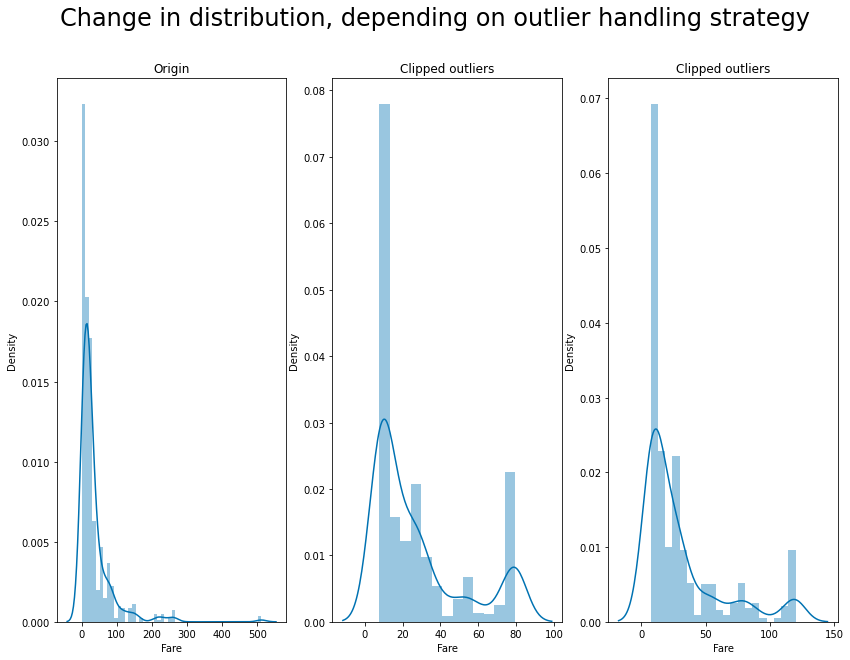

In [106]:
f, axes = plt.subplots(1, 3)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.distplot(titanic_dataset["Fare"], ax=axes[0]).set_title("Origin")
sns.distplot(titanic_dataset_scipy_winsorize["Fare"], ax=axes[1]).set_title("Winsorized outliers")
sns.distplot(titanic_dataset_clipped["Fare"], ax=axes[2]).set_title("Clipped outliers");

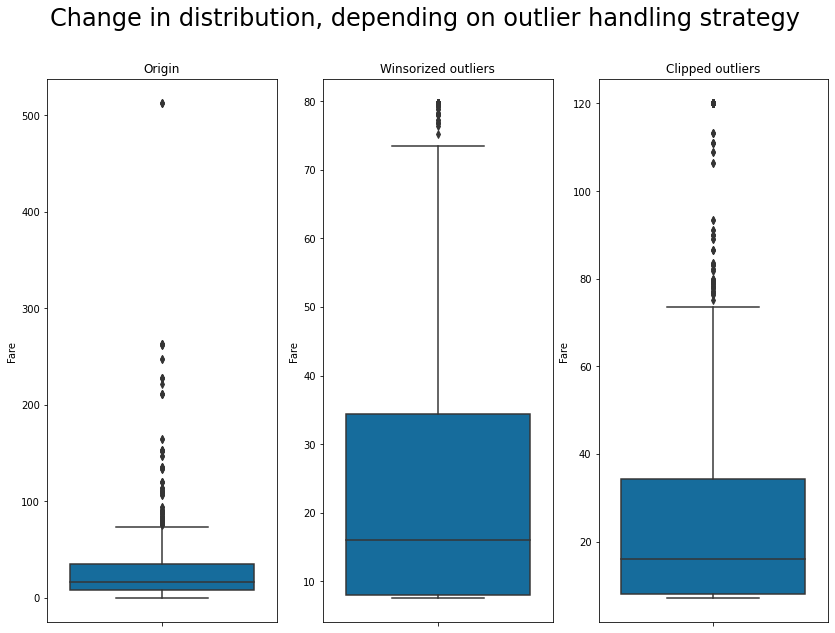

In [128]:
f, axes = plt.subplots(1, 3)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.boxplot(y=titanic_dataset["Fare"], ax=axes[0]).set_title("Origin")
sns.boxplot(y=titanic_dataset_scipy_winsorize["Fare"], ax=axes[1]).set_title("Winsorized outliers")
sns.boxplot(y=titanic_dataset_clipped["Fare"], ax=axes[2]).set_title("Clipped outliers");

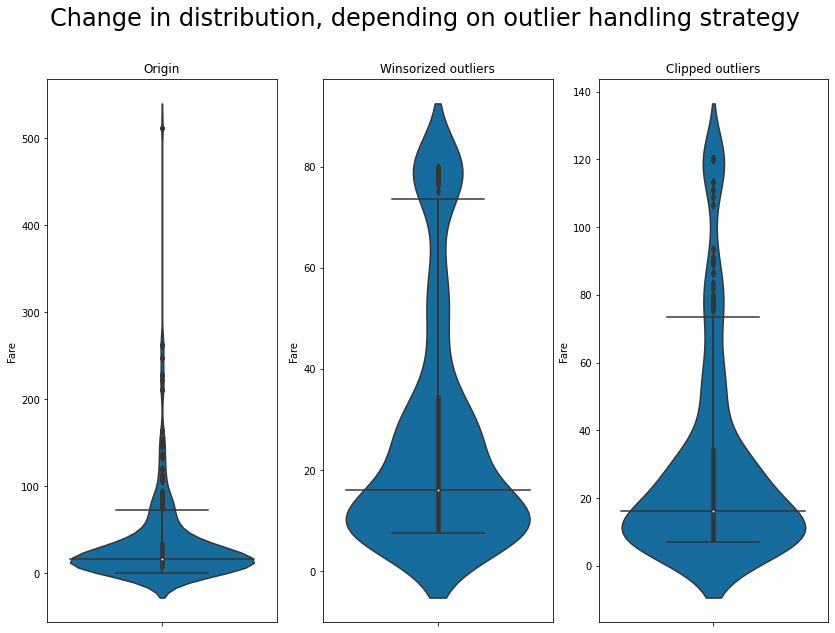

In [127]:
f, axes = plt.subplots(1, 3)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.boxplot(y=titanic_dataset["Fare"], showbox = False, ax=axes[0]).set_title("Origin")
sns.violinplot(y=titanic_dataset["Fare"], ax=axes[0])
sns.boxplot(y=titanic_dataset_scipy_winsorize["Fare"], showbox = False, ax=axes[1]).set_title("Winsorized outliers")
sns.violinplot(y=titanic_dataset_scipy_winsorize["Fare"], ax=axes[1])
sns.boxplot(y=titanic_dataset_clipped["Fare"], showbox = False, ax=axes[2]).set_title("Clipped outliers")
sns.violinplot(y=titanic_dataset_clipped["Fare"], ax=axes[2]);

Удаление выбросов

In [107]:
def drop_outlier(data, outlier_index):
    data_copy = data[~outlier_index]
    return(data_copy)

In [109]:
titanic_dataset_dropped_outliers = drop_outlier(data=titanic_dataset, outlier_index=index)
print(titanic_dataset_dropped_outliers.Fare.max())
print(titanic_dataset_dropped_outliers.Fare.min())

93.5
5.0


Замена выбросов средним/медианой/модой

In [110]:
def impute_outlier_with_avg(data, col, outlier_index, strategy='mean'):
    data_copy = data.copy(deep=True)
    if strategy == 'mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy == 'median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy == 'mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]           
    return(data_copy)

In [111]:
titanic_dataset_outlier_avg = impute_outlier_with_avg(data=titanic_dataset, col='Fare',
                                   outlier_index=index, strategy='mean')
titanic_dataset_outlier_avg[25:35]

Survived  Pclass     Sex   Age  SibSp       Fare
25         1       3  female  38.0      1  31.387500
26         0       3    male   NaN      0   7.225000
27         0       1    male  19.0      3  34.968315
28         1       3  female   NaN      0   7.879200
29         0       3    male   NaN      0   7.895800
30         0       1    male  40.0      0  27.720800
31         1       1  female   NaN      1  34.968315
32         1       3  female   NaN      0   7.750000
33         0       2    male  66.0      0  10.500000
34         0       1    male  28.0      1  82.170800

In [120]:
# Ещё один способ удаления выбросов
# ---------------------------------------
# cols = ['col_1', 'col_2'] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# ---------------------------------------

Q1 = titanic_dataset["Fare"].quantile(0.05)
Q3 = titanic_dataset["Fare"].quantile(0.95)
IQR = Q3 - Q1

titanic_dataset_outliers_selection = titanic_dataset[~((titanic_dataset["Fare"] < (Q1 - 1.5 * IQR)) | 
                                                       (titanic_dataset["Fare"] > (Q3 + 1.5 * IQR)))]

titanic_dataset_outliers_selection[25:35]

Survived  Pclass     Sex   Age  SibSp      Fare
25         1       3  female  38.0      1   31.3875
26         0       3    male   NaN      0    7.2250
27         0       1    male  19.0      3  263.0000
28         1       3  female   NaN      0    7.8792
29         0       3    male   NaN      0    7.8958
30         0       1    male  40.0      0   27.7208
31         1       1  female   NaN      1  146.5208
32         1       3  female   NaN      0    7.7500
33         0       2    male  66.0      0   10.5000
34         0       1    male  28.0      1   82.1708

<AxesSubplot:ylabel='Fare'>

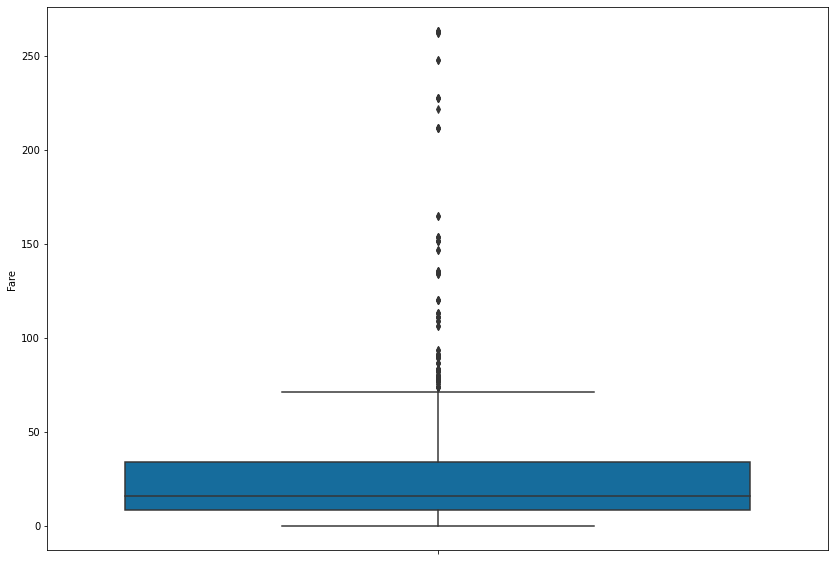

In [121]:
sns.boxplot(y=titanic_dataset_outliers_selection["Fare"])

##  Шкалирование данных

Шкалирование позволяет подготовить данные к использованию в алгоритме. 

Чем больше масштаб данных - тем больший вес им придаёт алгоритм. Это как минимум методологически неверно. 

В алгоритмах, использующих градиентный спуск очень важно, произведено ли шкалирование. Шкалирование влияет на сходимость.

Алгоритмы, основанные на метриках расстояния (kNN, SVM) очень чувствительны к шкалированию.

Деревья решений не очень чувствительны.

В любом случае, если выбирать между тем, чтобы шкалировать или не шкалировать - **нужно выбирать шкалирование!**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dataset, titanic_dataset.Survived, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((620, 6), (156, 6))

Нормализация данных

$z = (X - X.mean()) / X.std()$

In [133]:
ss = StandardScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
X_train_copy.head(6) 

Survived  Pclass     Sex   Age  SibSp    Fare  Fare_zscore
487         0       1    male  58.0      0  29.700    -0.098053
246         0       3  female  25.0      0   7.775    -0.529131
126         0       3    male   NaN      0   7.750    -0.529623
270         0       1    male   NaN      0  31.000    -0.072493
166         1       1  female   NaN      0  55.000     0.399383
298         1       1    male   NaN      0  30.500    -0.082324

In [134]:
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std())

-3.4381100117424204e-17
1.0008074284722805


Мин-Макс шкалирование

In [137]:
mms = MinMaxScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

Survived  Pclass     Sex   Age  SibSp    Fare  Fare_minmax
487         0       1    male  58.0      0  29.700     0.057971
246         0       3  female  25.0      0   7.775     0.015176
126         0       3    male   NaN      0   7.750     0.015127
270         0       1    male   NaN      0  31.000     0.060508
166         1       1  female   NaN      0  55.000     0.107353
298         1       1    male   NaN      0  30.500     0.059532

In [138]:
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


Робустное шкалирование

In [ ]:
rs = RobustScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

## Энкодинг переменных 

One-Hot encoding

In [ ]:
data1 = pd.get_dummies(data,drop_first=True)

In [ ]:
data1.head()

Энкодинг значением

In [ ]:
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)

In [ ]:
data4 = ord_enc.transform(data)
print(data4.head(5))

Таргет энкодинг

In [ ]:
target_enc = ce.TargetEncoder(cols=['Sex']).fit(X_train,y_train)

In [ ]:
data2 = target_enc.transform(data)
data2.head()

WOE энкодинг

In [ ]:
woe_enc = ce.WOEEncoder(cols=['Sex']).fit(X_train,y_train)

In [ ]:
data3 = woe_enc.transform(data)
data3.head()

## Feature Selection

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [ ]:
data.head(5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), 
                                                    data.target, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

Константные значения

In [ ]:
def constant_feature_detect(data,threshold=0.98):    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),'константные переменные')    
    return quasi_constant_feature

In [ ]:
quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.9)

In [ ]:
X_train['dummy'] = np.floor(X_train['worst smoothness']*10)
X_train.dummy.value_counts() / np.float(len(X_train))

In [ ]:
quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.9)
quasi_constant_feature

In [ ]:
X_train.drop(labels=quasi_constant_feature,axis=1,inplace=True)
print(X_train.shape)

Корреляционная фильтрация

In [ ]:
def corr_feature_detect(data,threshold=0.8):
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            correlated_groups.append(correlated_block)
    return correlated_groups

In [ ]:
corr = corr_feature_detect(data=X_train,threshold=0.9)
for i in corr:
    print(i,'\n')

Взаимная информация

In [ ]:
def mutual_info(X,y,select_k=10):

    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        
    else:
        raise ValueError("select_k должно быть положительным значением")
    
    return col

In [ ]:
mi = mutual_info(X=X_train,y=y_train,select_k=3)
print(mi)

In [ ]:
mi = mutual_info(X=X_train,y=y_train,select_k=0.2)
print(mi)

Хи-квадрат тест

In [ ]:
def chi_square_test(X,y,select_k=10):

    if select_k >= 1:
        sel_ = SelectKBest(chi2, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(chi2, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
    else:
        raise ValueError("select_k должно быть положительным значением")  
    
    return col

In [ ]:
chi = chi_square_test(X=X_train,y=y_train,select_k=3)
print(chi)

In [ ]:
chi = chi_square_test(X=X_train,y=y_train,select_k=0.2)
print(chi)

Одномерный ROC-AUC или MSE анализ

In [ ]:
def univariate_roc_auc(X_train,y_train,X_test,y_test,threshold):

    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]), len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col

In [ ]:
uni_roc_auc = univariate_roc_auc(X_train=X_train,y_train=y_train,
                                   X_test=X_test,y_test=y_test,threshold=0.8)
print(uni_roc_auc)

In [ ]:
def univariate_mse(X_train,y_train,X_test,y_test,threshold):

    mse_values = []
    for feature in X_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict(X_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = X_train.columns
    print(mse_values.sort_values(ascending=False))
    print(len(mse_values[mse_values > threshold]), len(X_train.columns))
    keep_col = mse_values[mse_values > threshold]
    return keep_col   

In [ ]:
uni_mse = univariate_mse(X_train=X_train,y_train=y_train,
                            X_test=X_test,y_test=y_test,threshold=0.4)
print(uni_mse)

## Oversampling/undersampling 

In [ ]:
len(y_train)

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
len(y_res)

In [ ]:
cn = CondensedNearestNeighbour(random_state=42)

In [ ]:
X_res, y_res = cn.fit_resample(X_train, y_train)

In [ ]:
len(y_res)